<a href="https://colab.research.google.com/github/aditi2259/tathya/blob/main/Tathya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [ ]:
file_path = '/content/Air Quality data (1).csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Name of the city,Date of the record,PM2.5 levels,PM10 levels.,NO (Nitric Oxide) levels.,NO2 (Nitrogen Dioxide) levels,NOx levels,NH3 (Ammonia) levels.,CO (Carbon Monoxide) levels,SO2 (Sulfur Dioxide) levels,O3 (Ozone) levels.,Benzene,Toluene,Xylene,Air Quality Index (AQI) value,AQI bucket/category
0,Mumbai,1/1/2015,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0,NaN,0
1,Lucknow,1/1/2015,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN,NaN
2,Delhi,1/1/2015,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
3,NY,1/1/2015,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,0
4,Bengaluru,1/1/2015,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,NaN,NaN,NaN


Data Cleaning

In [ ]:
data.columns = data.columns.str.strip()
data['Date of the record'] = pd.to_datetime(data['Date of the record'], errors='coerce')
data = data.dropna(subset=['Date of the record'])

In [ ]:
data.fillna(data.median(numeric_only=True), inplace=True)

In [ ]:
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

EDA


In [ ]:
# Average pollutant levels by city (for numeric columns only)
average_pollutants = data.groupby('Name of the city')[numeric_columns].mean()

# Seasonal trends (group by month)
data['Month'] = data['Date of the record'].dt.month
seasonal_trends = data.groupby('Month')[numeric_columns].mean()

# Correlation between pollutants and AQI (ensure AQI and pollutants are numeric)
correlation = data[numeric_columns].corr()['Air Quality Index (AQI) value'].sort_values(ascending=False)

Visualization

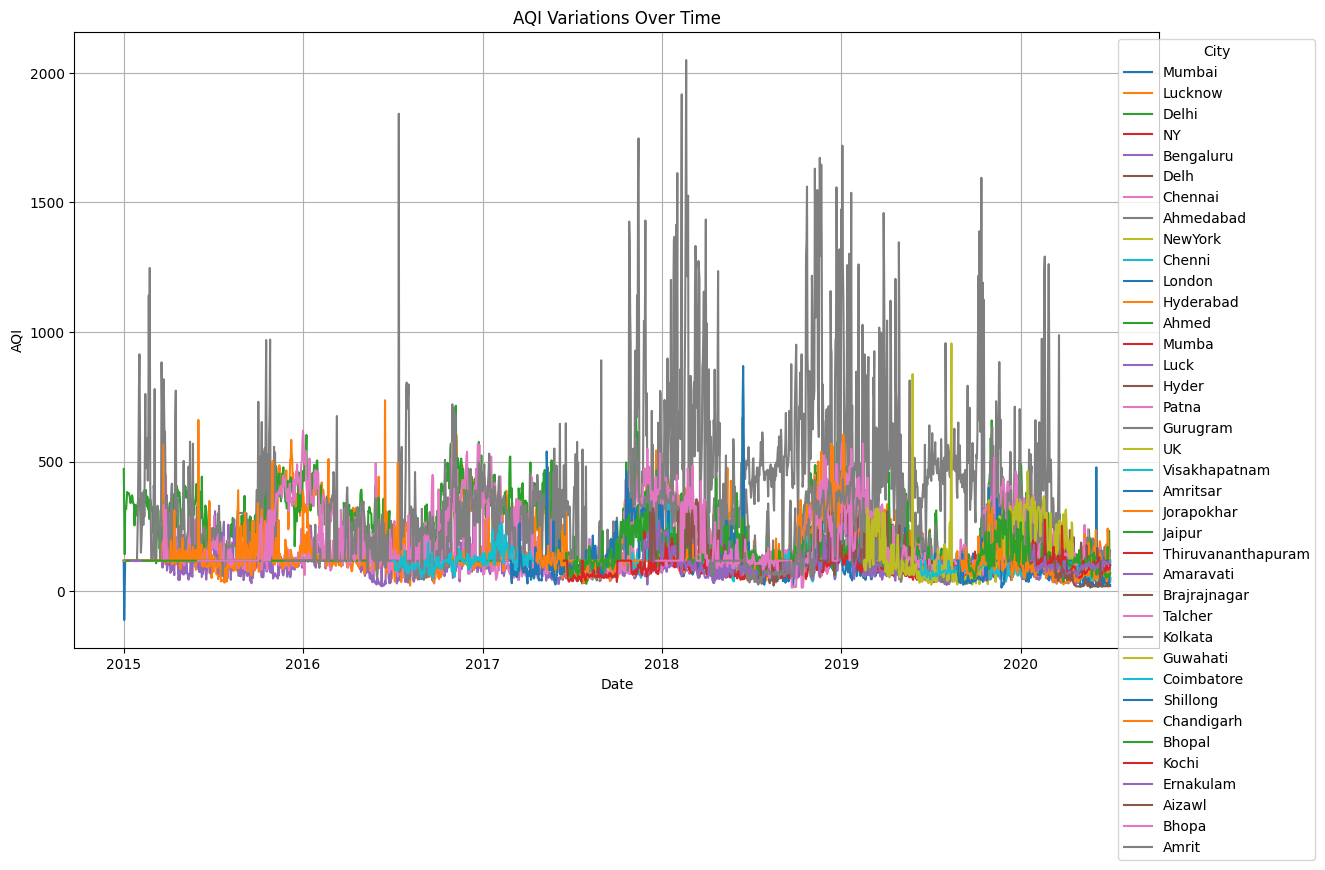

In [ ]:
# AQI Variations Over Time for Each City
plt.figure(figsize=(14, 8))
for city in data['Name of the city'].unique():
    city_data = data[data['Name of the city'] == city]
    plt.plot(city_data['Date of the record'], city_data['Air Quality Index (AQI) value'], label=city)

plt.title('AQI Variations Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend(title='City', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
plt.show()

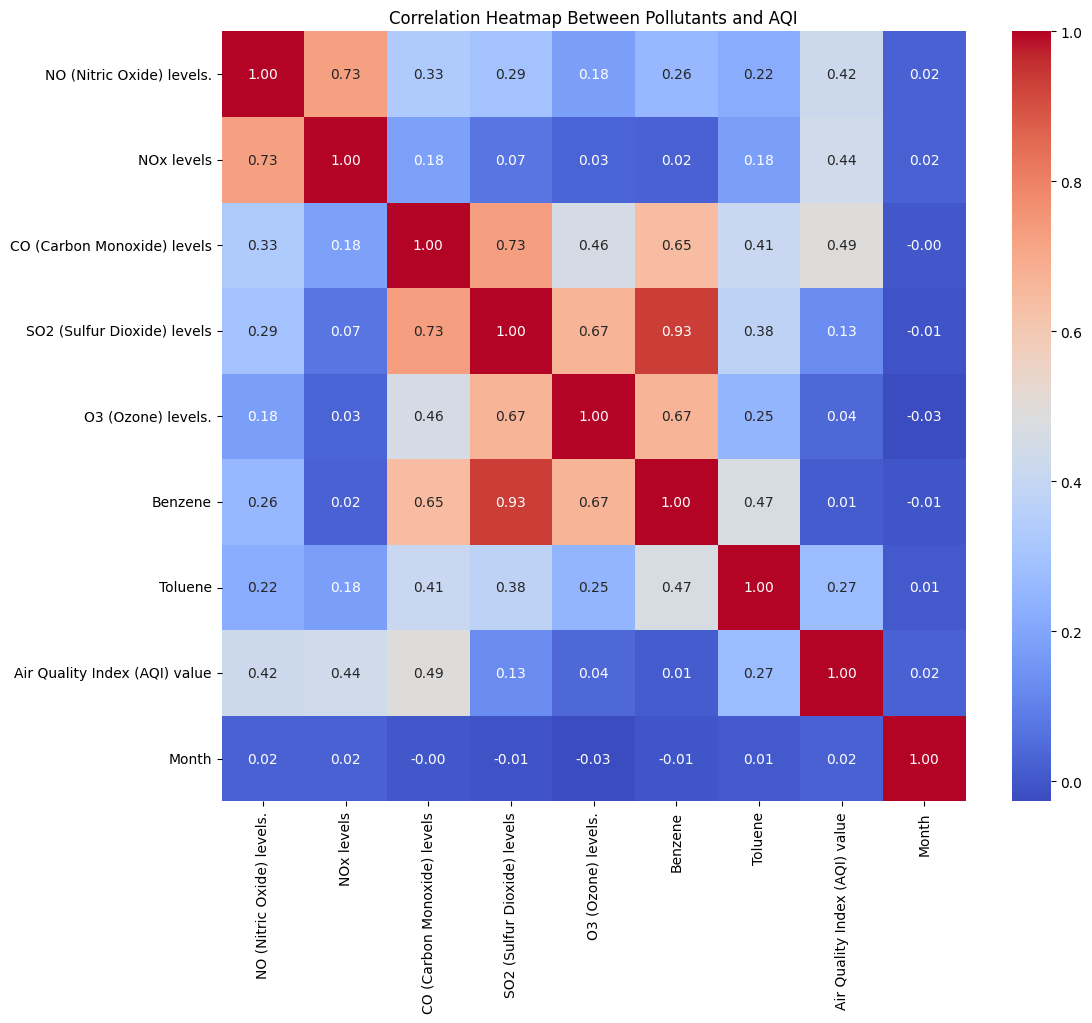

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation = data[numeric_columns].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap Between Pollutants and AQI')
plt.show()

<ipython-input-51-ab23794f066e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg_aqi.index, y=city_avg_aqi.values, palette='coolwarm')


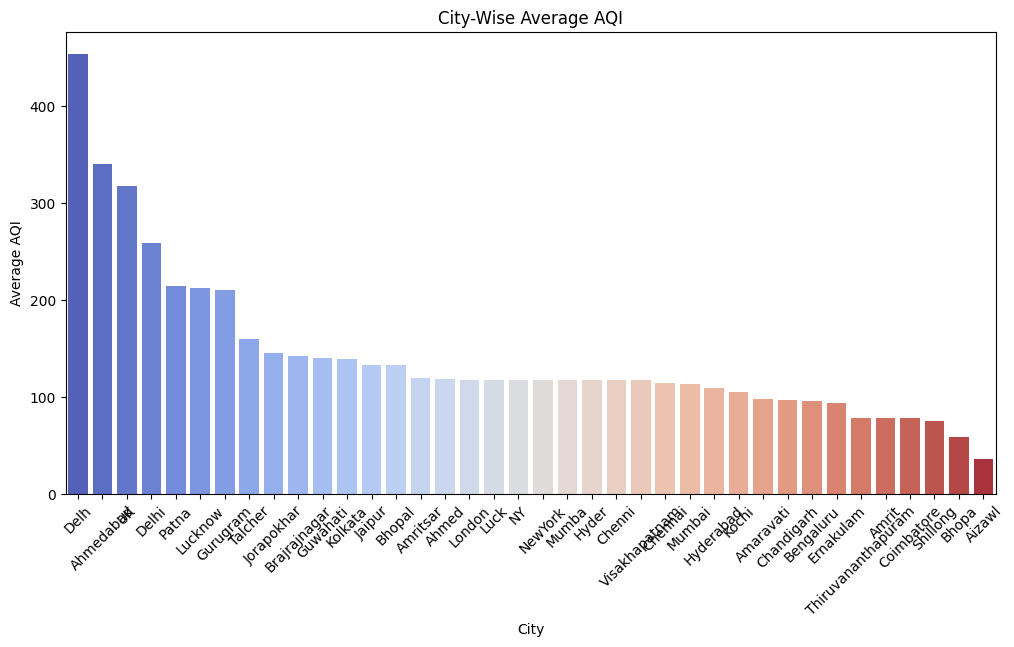

In [ ]:
# City-Wise Average AQI
city_avg_aqi = data.groupby('Name of the city')['Air Quality Index (AQI) value'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=city_avg_aqi.index, y=city_avg_aqi.values, palette='coolwarm')
plt.title('City-Wise Average AQI')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.show()

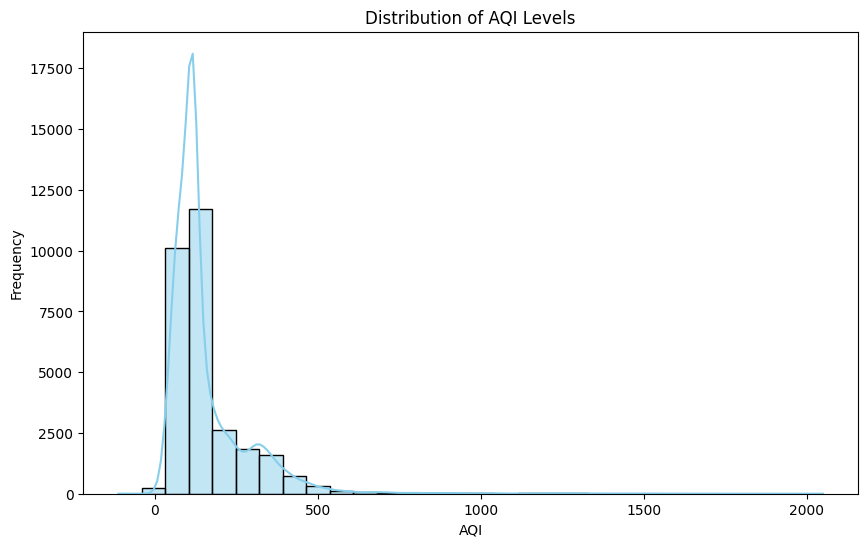

In [ ]:
# Distribution of AQI
plt.figure(figsize=(10, 6))
sns.histplot(data['Air Quality Index (AQI) value'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of AQI Levels')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()